# Desafio 4

## Temática: salud  - Dataset: Contagiados COVID 19

*El repositorio con los datasets y notebooks que se van a utilizar en el proyecto final del curso estan ubicados en:** https://github.com/wbivanco/ds_coderhouse.git 


#### Objetivo
¿Con los datos históricos que se posee acerca de los contagiados en la República Argentina, hay más mujeres que hombres que se contagiaron de covid en el periodo seleccionado?

#### Contexto del negocio
El año 2019 comenzaron los contagios de COVID-19, al momento que la misma se convirtió en un pandemia paso a ser un tema de suma importancia para los paises, apartir de ese instante se comenzó a llevar registro de los contagios, en el caso particular de la Argentina, toda esa información fue administrada por el gobierno nacional atraves de un sistema de carga de esa data. Dichos datos fueron disponibilizados para que el público en general pueda acceder y descargar los mismos.

#### Problema del negocio
A la información recavada por parte del gobierno nacional se la pretende poder utilizar para poder llevar a cabo la toma de decisiones estratégicas.

#### Contexto analítico
El dataset que es utilizado en el notebook tiene como temática la salud, el mismo fué descargado de https://www.datos.gob.ar que es el sitio oficial del gobierno de la República Argentina. Dentro del sitio luego de un análisis se decidio descargar la información de los contagiados de la Republica Argentina. Es un único archivo en formato CSV.

#### Exploración de datos (EDA)
Remitirse a la sección dentro del notebook donde se hace referencia a esto.

##### i) Abstract:
El dataset almacena el listado de los contagiados de COVID-19 en la República Argentina desde el 01/03/2020 hasta el 04/06/2022, dicho dataset tiene una cantidad de 105.916.221 registros de los cuales seleccione los primeros 100.000 registros por lo tanto hay variables como las fechas que solo muestran un periodo muy corto.

El dataset lleva el registro de los contagios de COVID-19 que se produjeron en Argentina, dentro de información de maneja se puede mencionar que posee 17 campos entre los que se destacan los siguientes:

- id_evento_caso = es el número de caso, debido a que solo trabajamos con una parte de datasets, no será información muy útil.
- sexo
- edad
- residencia_provincia_nombre = es la provincia de residencia de la persona, aquí hay que aclarar que Buenos Aires y CABA pertenecen a la misma provincia que es Buenos Aires, pero hacen la diferencia entre interior(Buenos Aires) y capital(CABA).
- origen_financiamiento = indica si el análisis clínico fue realizado en la parte pública o privada.
- residencia_departemento_nombre = me indica el departamento de residencia de la persona cargado; este es un campo que no se tiene mucho en cuenta por que tiene mucha información sucia, como datos sin especificar, valores ficticios, etc.
- Hay casos de datos de tipos fecha que tienen muchos registros no cargados, como fecha_inicio_sintomas o fecha de fallecimiento, en este último caso evidencian que son para las personas que no han fallecido por causas del COVID-19.

Se desea observar cómo es la proporción de contagios con respecto a las provincias.

##### ii) Pregunta / Hipótesis
Hay más mujeres que hombres que se contagiaron de covid en el periodo seleccionado.

##### iii) EDA

In [17]:
import pandas as pd

contagiados_covid = pd.read_csv('datasets/contagiados.csv')

contagiados_covid.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,55.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2022-06-05
1,10000000,F,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2022-06-05
2,10000001,F,23.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2022-06-05
3,10000002,F,45.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2022-06-05
4,10000003,F,34.0,Años,Argentina,CABA,COMUNA 01,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,1,2022-06-05


In [18]:
contagiados_covid.shape

(100000, 25)

In [19]:
contagiados_covid.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [20]:
contagiados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id_evento_caso                    100000 non-null  int64  
 1   sexo                              100000 non-null  object 
 2   edad                              99970 non-null   float64
 3   edad_años_meses                   100000 non-null  object 
 4   residencia_pais_nombre            100000 non-null  object 
 5   residencia_provincia_nombre       100000 non-null  object 
 6   residencia_departamento_nombre    100000 non-null  object 
 7   carga_provincia_nombre            100000 non-null  object 
 8   fecha_inicio_sintomas             36418 non-null   object 
 9   fecha_apertura                    100000 non-null  object 
 10  sepi_apertura                     100000 non-null  int64  
 11  fecha_internacion                 2658 non-null    ob

In [21]:
contagiados_covid.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,1.000000e+05,99970.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,9.375346e+06,38.579594,14.669870,22.348080,23.366560,204.02063
std,2.373808e+06,17.447920,2.362236,28.592709,28.796844,253.71888
min,1.000000e+06,1.000000,14.000000,2.000000,2.000000,0.00000
25%,1.001848e+07,26.000000,14.000000,2.000000,6.000000,14.00000
50%,1.004438e+07,37.000000,14.000000,6.000000,6.000000,84.00000
75%,1.007070e+07,50.000000,14.000000,30.000000,34.000000,410.00000
max,1.009716e+07,222.000000,23.000000,94.000000,99.000000,882.00000


In [39]:
contagiados_covid.groupby("sexo").count()

,id_evento_caso,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
sexo,,,,,,,,,,,,,,,,,,,,,
F,52663,52662,52663,52663,52663,52663,52663,19292,52663,52663,...,260,52663,52663,52663,52663,52663,52663,49292,52663,52663
M,46595,46591,46595,46595,46595,46595,46595,16701,46595,46595,...,363,46595,46595,46595,46595,46595,46595,43769,46595,46595
NR,742,717,742,742,742,742,742,425,742,742,...,7,742,742,742,742,742,742,628,742,742


In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

###### Nombre de la provincia de residencia

In [23]:
total_por_provincia = contagiados_covid.groupby("residencia_provincia_nombre").count()
total_por_provincia = total_por_provincia.id_evento_caso

Text(0.5, 1.0, 'Cantidad de contagios por provincias')

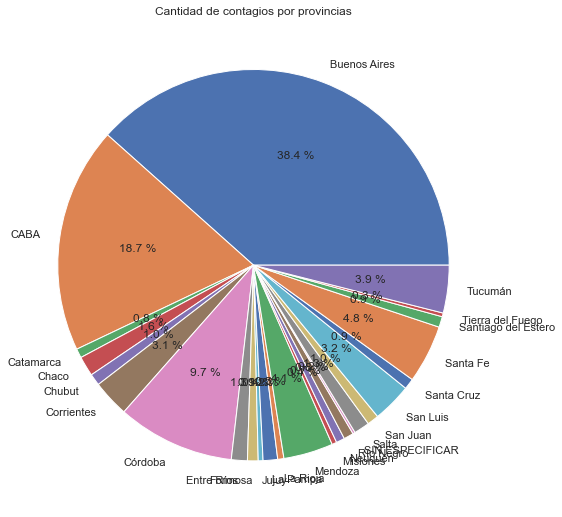

In [24]:
fig, ax = plt.subplots(figsize=(14, 9))

ax.pie(total_por_provincia.values, labels=total_por_provincia.index, autopct="%0.1f %%")

plt.title('Cantidad de contagios por provincias')

###### Comtagiados por provincia

In [25]:
total_por_provincia = contagiados_covid.groupby("residencia_provincia_nombre").count()

total_por_provincia = total_por_provincia.sort_values('id_evento_caso', ascending=False)[:15]

<AxesSubplot:xlabel='residencia_provincia_nombre', ylabel='id_evento_caso'>

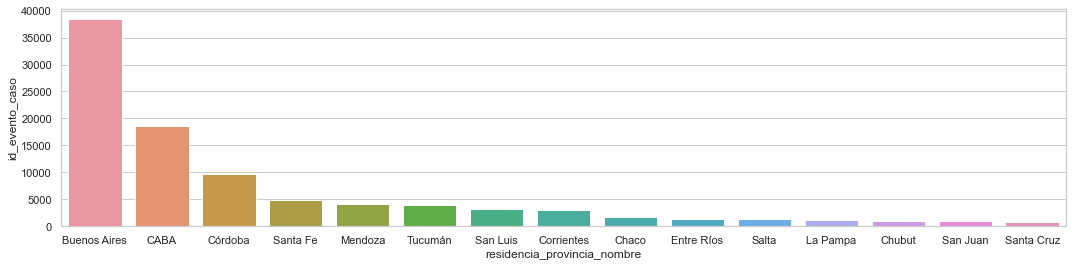

In [26]:
sns.set_theme(style="whitegrid")

f, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))

sns.barplot(x=total_por_provincia.index, y=total_por_provincia.id_evento_caso, data=total_por_provincia)

###### Sexo

In [50]:
discriminado_por_sexo = contagiados_covid.groupby("sexo").count()

discriminado_por_sexo = discriminado_por_sexo.id_evento_caso

Text(0.5, 1.0, 'Contagiados por sexo')

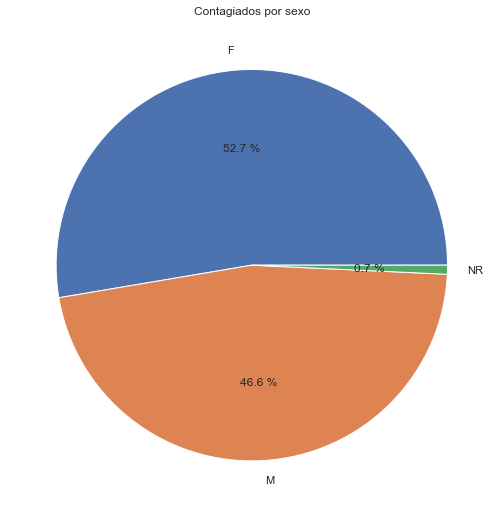

In [51]:
fig, ax = plt.subplots(figsize=(14, 9))

ax.pie(discriminado_por_sexo.values, labels=discriminado_por_sexo.index, autopct="%0.1f %%")

plt.title('Contagiados por sexo')

##### iv) Recomendaciones